- Gabriel Antony Cadima Ciziks |
- Cassio Valezzi | RM551059
- Victor Nuzzi | RM98209

1. Importando Bibliotecas e Carregando Dados

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [78]:
libertadores_dataset = "./Libertadores_Matches.csv"
df = pd.read_csv(libertadores_dataset)
df['datetime'] = pd.to_datetime(df['datetime'])
df['home_goal'] = pd.to_numeric(df['home_goal'], errors='coerce')
df['away_goal'] = pd.to_numeric(df['away_goal'], errors='coerce')
df = df.dropna()
# Criar label para o resultado do jogo
df['result'] = df.apply(lambda row: 1 if row['home_goal'] > row['away_goal'] else (0 if row['home_goal'] < row['away_goal'] else -1), axis=1)
df['result'] = df['result'].astype(int)

df


,datetime,home_team,away_team,home_goal,away_goal,season,stage,result
0,2013-02-12 20:15:00,Nacional (URU),Barcelona-EQU,2.0,2.0,2013.0,group stage,-1
1,2013-02-13 22:00:00,Boca Juniors,Toluca,1.0,2.0,2013.0,group stage,0
2,2013-02-19 23:45:00,Toluca,Nacional (URU),2.0,3.0,2013.0,group stage,0
3,2013-02-27 19:45:00,Barcelona-EQU,Boca Juniors,1.0,2.0,2013.0,group stage,0
4,2013-03-07 00:15:00,Toluca,Barcelona-EQU,1.0,1.0,2013.0,group stage,-1
...,...,...,...,...,...,...,...,...
1249,2022-08-10 21:30:00,Talleres,Vélez Sarsfield,0.0,1.0,2022.0,quarterfinals,0
1250,2022-08-30 21:30:00,Athletico,Palmeiras,1.0,0.0,2022.0,semifinals,1
1251,2022-09-06 21:30:00,Palmeiras,Athletico,2.0,2.0,2022.0,semifinals,-1
1252,2022-08-31 21:30:00,Vélez Sarsfield,Flamengo,0.0,4.0,2022.0,semifinals,0


In [79]:
df.dtypes

datetime     datetime64[ns]
home_team            object
away_team            object
home_goal           float64
away_goal           float64
season              float64
stage                object
result                int32
dtype: object

2. Limpeza de Dados

In [80]:
# Verificar dados ausentes
missing_data = df.isnull().sum()
missing_data


datetime     0
home_team    0
away_team    0
home_goal    0
away_goal    0
season       0
stage        0
result       0
dtype: int64

3. Estatísticas Descritivas


In [81]:
stats = df.describe()
stats

,datetime,home_goal,away_goal,season,result
count,1253,1253.000000,1253.000000,1253.000000,1253.000000
mean,2017-11-02 13:40:54.828411904,1.588986,0.964884,2017.486034,0.274541
min,2013-02-12 20:15:00,0.000000,0.000000,2013.000000,-1.000000
25%,2015-04-07 20:00:00,1.000000,0.000000,2015.000000,0.000000
50%,2017-11-01 21:45:00,1.000000,1.000000,2017.000000,1.000000
75%,2020-09-23 19:15:00,2.000000,2.000000,2020.000000,1.000000
max,2022-09-07 21:30:00,8.000000,7.000000,2022.000000,1.000000
std,NaN,1.395831,1.054602,2.870335,0.818885


4. Análise Visual com Seaborn

4.1 Distribuição de Gols Marcados

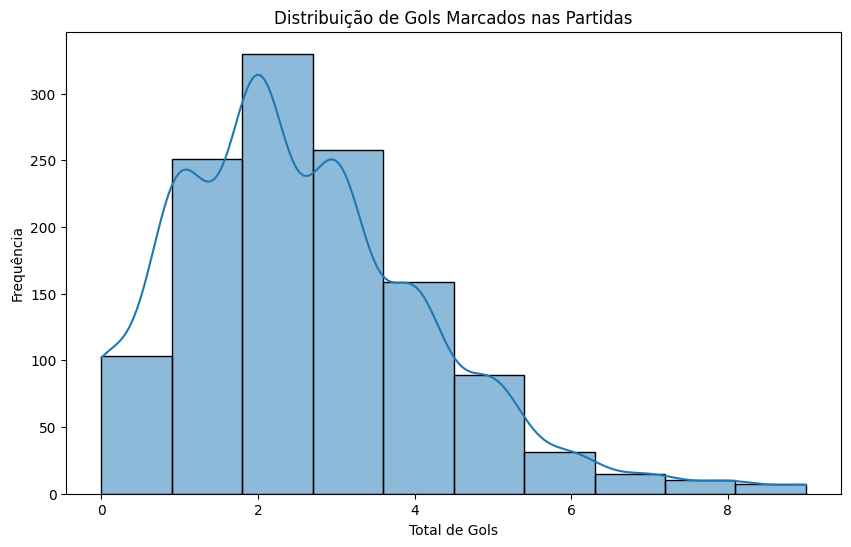

In [82]:

# Distribuição de gols marcados
plt.figure(figsize=(10, 6))
sns.histplot(df['home_goal'] + df['away_goal'], bins=10, kde=True)
plt.title('Distribuição de Gols Marcados nas Partidas')
plt.xlabel('Total de Gols')
plt.ylabel('Frequência')
plt.show()

4.2 Comparação de Desempenho em Casa e Fora

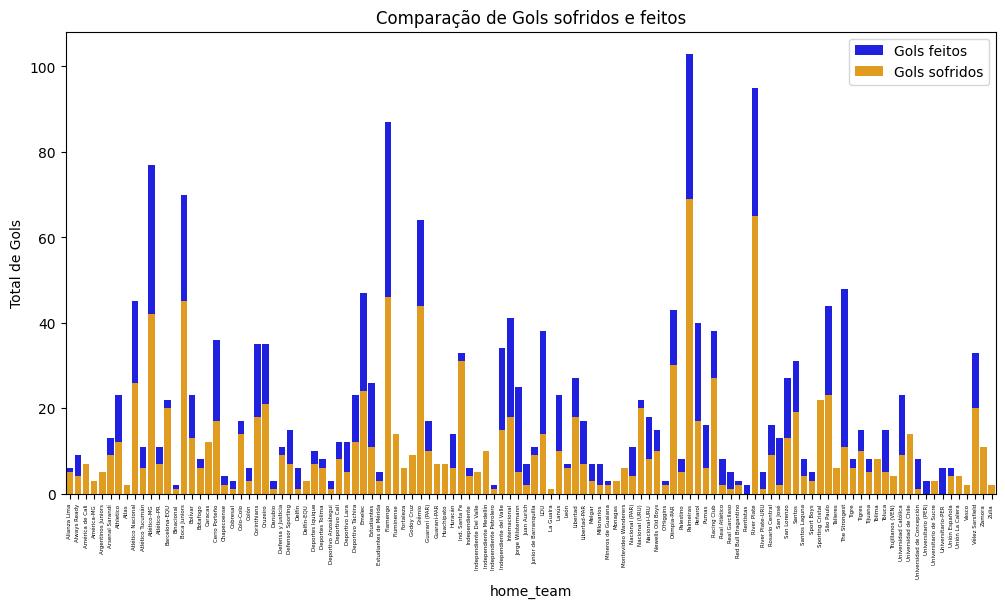

In [100]:
# Comparação de gols em casa e fora
home_goals = df.groupby('home_team')['home_goal'].sum()
away_goals = df.groupby('away_team')['away_goal'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=home_goals.index, y=home_goals.values, color='blue', label='Gols feitos')
sns.barplot(x=away_goals.index, y=away_goals.values, color='orange', label='Gols sofridos')
plt.title('Comparação de Gols sofridos e feitos')
plt.ylabel('Total de Gols')
plt.xticks(rotation=90, fontsize=4) 
plt.legend()
plt.show()

5. Modelagem de Machine Learning

In [84]:
# Adicionar resultados das partidas ao dataset
def get_outcome(row):
    if row['home_goal'] > row['away_goal']:
        return 1  # Casa Ganha
    elif row['home_goal'] < row['away_goal']:
        return -1  # Visitante Ganha
    else:
        return 0  # Empate

df['outcome'] = df.apply(get_outcome, axis=1)

# Preparar features e target
X = df[['home_team', 'away_team']]
y = df['outcome']

# Converter variáveis para Numérico
X['home_team'] = pd.factorize(X['home_team'])[0]
X['away_team'] = pd.factorize(X['away_team'])[0]

c:\AppData\Local\Temp\ipykernel_6760\3149077531.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['home_team'] = pd.factorize(X['home_team'])[0]
c:\AppData\Local\Temp\ipykernel_6760\3149077531.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['away_team'] = pd.factorize(X['away_team'])[0]


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

          -1       0.28      0.24      0.26        66
           0       0.18      0.15      0.16        61
           1       0.57      0.65      0.61       124

    accuracy                           0.42       251
   macro avg       0.34      0.35      0.34       251
weighted avg       0.40      0.42      0.41       251

Accuracy: 0.42231075697211157


In [86]:

def predict_match(home_team, away_team, model, df):
    home_encoded = pd.factorize(df['home_team'])[0][df['home_team'] == home_team][0]
    away_encoded = pd.factorize(df['away_team'])[0][df['away_team'] == away_team][0]
    
    match_data = np.array([[home_encoded, away_encoded]])
    
    prediction = model.predict(match_data)
    
    outcome_mapping = {1: 'Casa Ganha', -1: 'Visitante Ganha', 0: 'Empate'}
    return outcome_mapping[prediction[0]]


In [99]:
time_casa = "São Paulo"
time_visitante = "Santos"
result = predict_match(time_casa, time_visitante, model, df)
print(f'O resultado previsto para {time_casa} vs {time_visitante} é: {result}')

O resultado previsto para São Paulo vs Santos é: Casa Ganha


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
